# Simple movie analysis

Today, I'm going to analyze some of movie data from TMDB. I will use some packages that I studied from a book named 'Massage data with python'(파이썬으로 데이터 주무르기). It is very helpful to learn some of python data analyzing packages.

I downloaded the data from Kaggle.<br>
https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv

In [50]:
import numpy as np
import pandas as pd

In [51]:
movie_data = pd.read_csv("movies_data.csv", thousands=',', encoding='utf-8')

In [52]:
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [53]:
new_movie_data = pd.DataFrame(movie_data, columns = ['title','release_date','budget','revenue','popularity','vote_average','vote_count'])
new_movie_data.head()

,title,release_date,budget,revenue,popularity,vote_average,vote_count
0,Avatar,2009-12-10,237000000,2787965087,150.437577,7.2,11800
1,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,139.082615,6.9,4500
2,Spectre,2015-10-26,245000000,880674609,107.376788,6.3,4466
3,The Dark Knight Rises,2012-07-16,250000000,1084939099,112.312950,7.6,9106
4,John Carter,2012-03-07,260000000,284139100,43.926995,6.1,2124


In [54]:
new_movie_data = new_movie_data[new_movie_data['vote_count']>100]
new_movie_data = new_movie_data[new_movie_data['budget']>10000]
new_movie_data = new_movie_data[new_movie_data['revenue']>10000]
new_movie_data['profit']=new_movie_data['revenue']-new_movie_data['budget']
new_movie_data['profit_ratio']=new_movie_data['profit']/new_movie_data['budget']
new_movie_data = new_movie_data.sort_values(by='profit',ascending=False)
new_movie_data.rename(columns={new_movie_data.columns[5] : 'rating'}, inplace=True)
new_movie_data = new_movie_data.reset_index(drop=True)
new_movie_data

,title,release_date,budget,revenue,popularity,rating,vote_count,profit,profit_ratio
0,Avatar,2009-12-10,237000000,2787965087,150.437577,7.2,11800,2550965087,10.763566
1,Titanic,1997-11-18,200000000,1845034188,100.025899,7.5,7562,1645034188,8.225171
2,Jurassic World,2015-06-09,150000000,1513528810,418.708552,6.5,8662,1363528810,9.090192
3,Furious 7,2015-04-01,190000000,1506249360,102.322217,7.3,4176,1316249360,6.927628
4,The Avengers,2012-04-25,220000000,1519557910,144.448633,7.4,11776,1299557910,5.907081
5,Avengers: Age of Ultron,2015-04-22,280000000,1405403694,134.279229,7.3,6767,1125403694,4.019299
6,Frozen,2013-11-27,150000000,1274219009,165.125366,7.3,5295,1124219009,7.494793
7,Minions,2015-06-17,74000000,1156730962,875.581305,6.4,4571,1082730962,14.631499
8,The Lord of the Rings: The Return of the King,2003-12-01,94000000,1118888979,123.630332,8.1,8064,1024888979,10.903074
9,Iron Man 3,2013-04-18,200000000,1215439994,77.682080,6.8,8806,1015439994,5.077200


In [55]:
new_movie_data.describe()

,budget,revenue,popularity,rating,vote_count,profit,profit_ratio
count,2.699000e+03,2.699000e+03,2699.000000,2699.000000,2699.000000,2.699000e+03,2699.000000
mean,4.583976e+07,1.426095e+08,33.836919,6.375621,1158.581697,9.676974e+07,11.306942
std,4.632795e+07,1.967059e+08,37.713676,0.827649,1480.606205,1.681072e+08,261.414114
min,1.200000e+04,2.200000e+04,1.551497,3.000000,101.000000,-1.657101e+08,-0.994922
25%,1.455000e+07,3.010860e+07,15.007369,5.800000,298.000000,5.787096e+06,0.305825
50%,3.000000e+07,7.627045e+07,24.992057,6.400000,613.000000,4.198046e+07,1.610100
75%,6.000000e+07,1.703157e+08,41.542622,7.000000,1374.000000,1.187361e+08,3.795576
max,3.800000e+08,2.787965e+09,875.581305,8.500000,13752.000000,2.550965e+09,12889.386667


It is preprocessed the data with 7 columns. I'm gonna figure out the correlationships among some columns.

In [56]:
np.corrcoef(new_movie_data['budget'], new_movie_data['popularity'])

array([[1.      , 0.387319],
       [0.387319, 1.      ]])

In [57]:
np.corrcoef(new_movie_data['budget'], new_movie_data['rating'])

array([[ 1.       , -0.0726747],
       [-0.0726747,  1.       ]])

In [58]:
np.corrcoef(new_movie_data['popularity'], new_movie_data['rating'])

array([[1.        , 0.28344984],
       [0.28344984, 1.        ]])

In [59]:
np.corrcoef(new_movie_data['profit'], new_movie_data['rating'])

array([[1.        , 0.22077101],
       [0.22077101, 1.        ]])

Now, I'm going to visualize them.

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

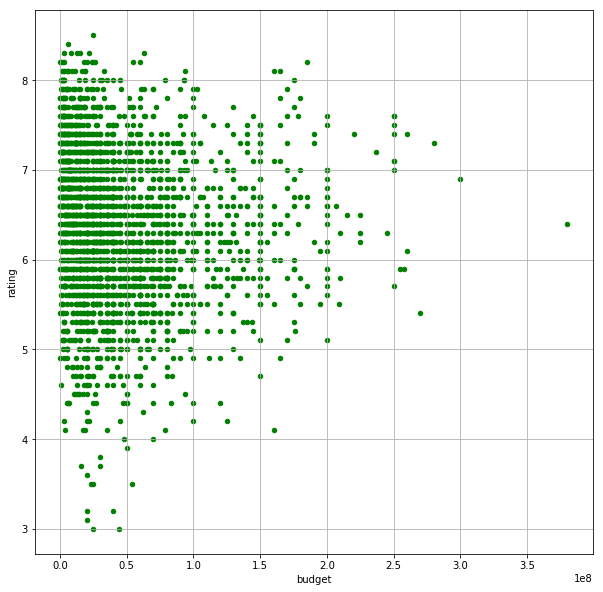

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(new_movie_data['budget'], new_movie_data['rating'], s=20, c='g')
plt.xlabel('budget')
plt.ylabel('rating')
plt.grid()
plt.show()

It shows that low-budget movies can be given higher ratings.

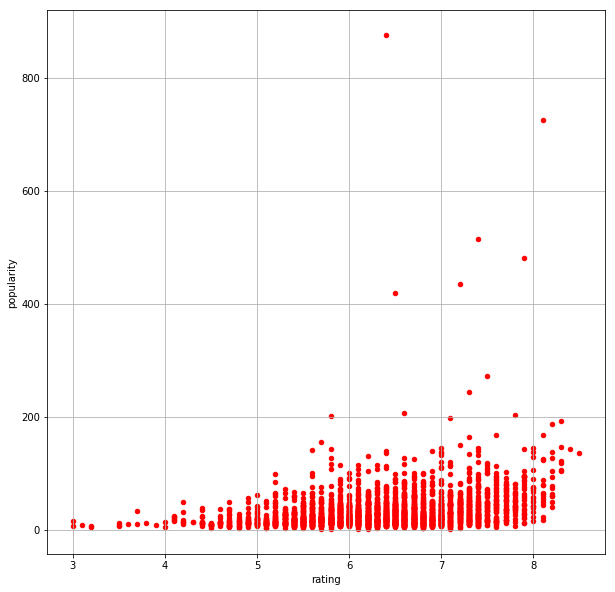

In [62]:
plt.figure(figsize=(10,10))
plt.scatter( new_movie_data['rating'],new_movie_data['popularity'], s=20, c='r')
plt.xlabel('rating')
plt.ylabel('popularity')
plt.grid()
plt.show()

I think there is little correlationship between rating and popularity

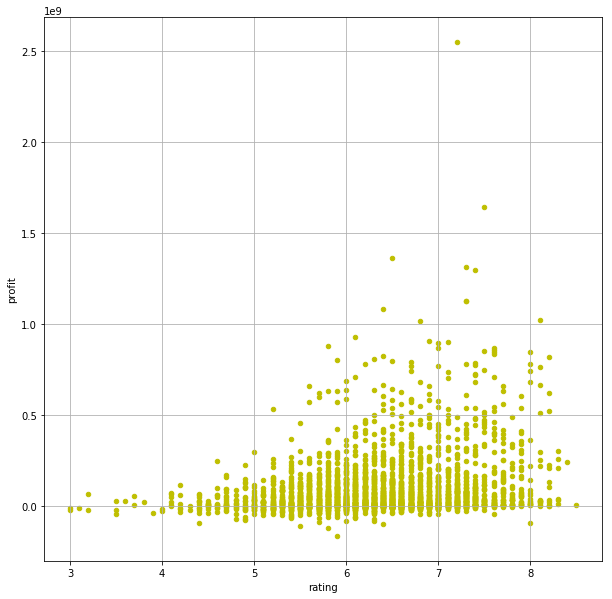

In [63]:
plt.figure(figsize=(10,10))
plt.scatter( new_movie_data['rating'],new_movie_data['profit'], s=20, c='y')
plt.xlabel('rating')
plt.ylabel('profit')
plt.grid()
plt.show()

It shows that high profit movies don't have high rating.

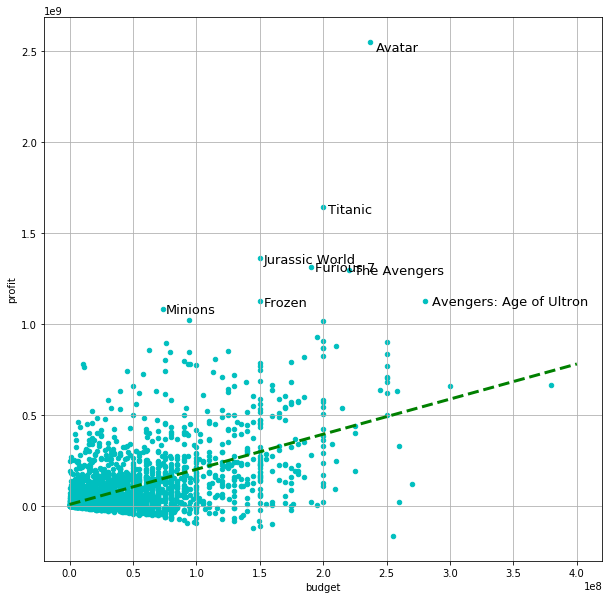

In [66]:
fp1 = np.polyfit(new_movie_data['budget'], new_movie_data['profit'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(0,400000000,2)

plt.figure(figsize=(10,10))
plt.scatter(new_movie_data['budget'], new_movie_data['profit'], s=20, c='c')

for n in range(8):
    plt.text(new_movie_data['budget'][n]*1.02, new_movie_data['profit'][n]*0.98,
            new_movie_data['title'][n], fontsize=13)

plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('budget')
plt.ylabel('profit')
plt.grid()
plt.show()

As you see, There is a little clear correlationship between budget and profit. More budget, More profit.